In [16]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#load the datset

df = pd.read_csv("/content/retail_sales_dataset.csv")

In [18]:
#check the data

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [19]:
#check the datatype of the present data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


# Step2 : EDA

In [20]:
# check is their missing value in the dataset

df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


# Step3 :Descriptive Statistics:

In [21]:
#mean mode std of the following data

df.describe(include='all')


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [22]:
# Convert 'Date' column to datetime for time series analysis

df['Date'] = pd.to_datetime(df['Date'])

df


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


# Time Series Analysis:

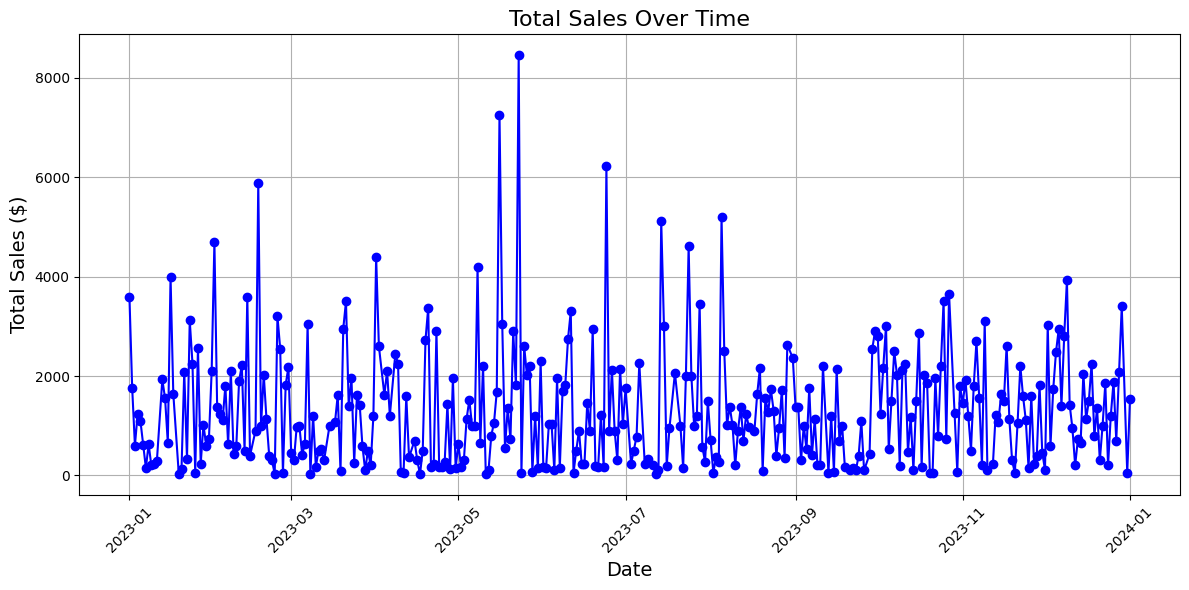

In [23]:
# Aggregate total sales by date to analyze trends over time
sales_over_time = df.groupby('Date')['Total Amount'].sum().reset_index()

# Visualize the sales trends using a line plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Total Amount'], marker='o', color='b')
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Customer and Product Analysis:

<ipython-input-24-de9338a413a2>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()


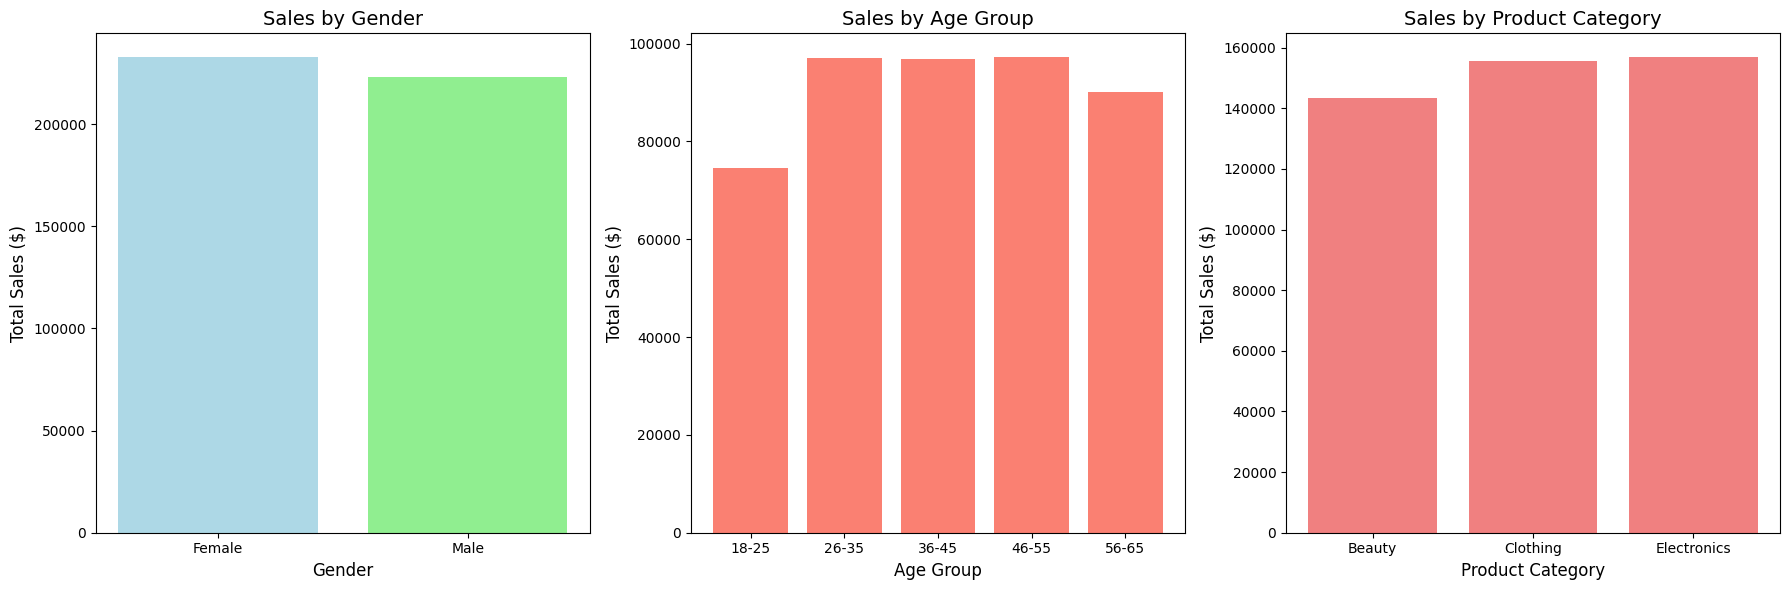

In [24]:
# Analyze purchasing behavior based on Gender
gender_sales = df.groupby('Gender')['Total Amount'].sum().reset_index()

# Analyze purchasing behavior based on Age groups (creating bins for age)
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()

# Analyze purchasing behavior based on Product Category
product_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()

# Visualize these insights using bar charts
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Gender sales
ax[0].bar(gender_sales['Gender'], gender_sales['Total Amount'], color=['lightblue', 'lightgreen'])
ax[0].set_title('Sales by Gender', fontsize=14)
ax[0].set_xlabel('Gender', fontsize=12)
ax[0].set_ylabel('Total Sales ($)', fontsize=12)

# Age group sales
ax[1].bar(age_group_sales['Age Group'], age_group_sales['Total Amount'], color='salmon')
ax[1].set_title('Sales by Age Group', fontsize=14)
ax[1].set_xlabel('Age Group', fontsize=12)
ax[1].set_ylabel('Total Sales ($)', fontsize=12)

# Product category sales
ax[2].bar(product_sales['Product Category'], product_sales['Total Amount'], color='lightcoral')
ax[2].set_title('Sales by Product Category', fontsize=14)
ax[2].set_xlabel('Product Category', fontsize=12)
ax[2].set_ylabel('Total Sales ($)', fontsize=12)

plt.tight_layout()
plt.show()


# Visualization

<ipython-input-13-8427a55db42f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Product Category', palette='viridis')


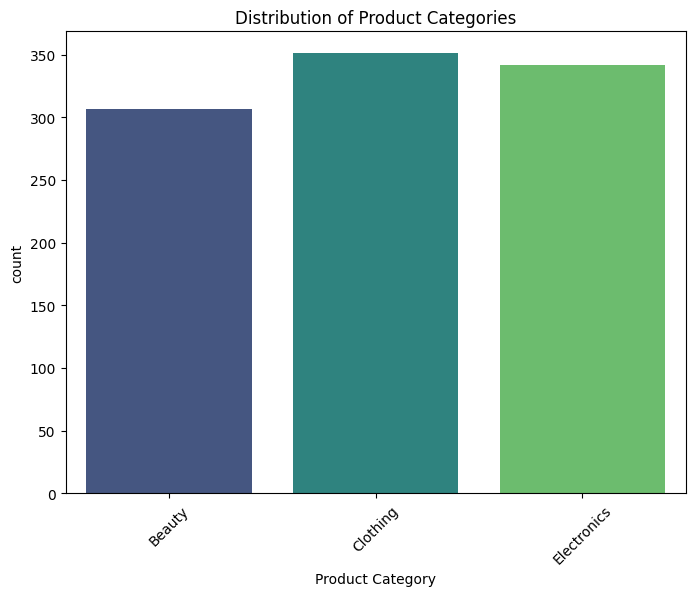

In [13]:
# 1. Bar chart: Distribution of Product Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Product Category', palette='viridis')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()


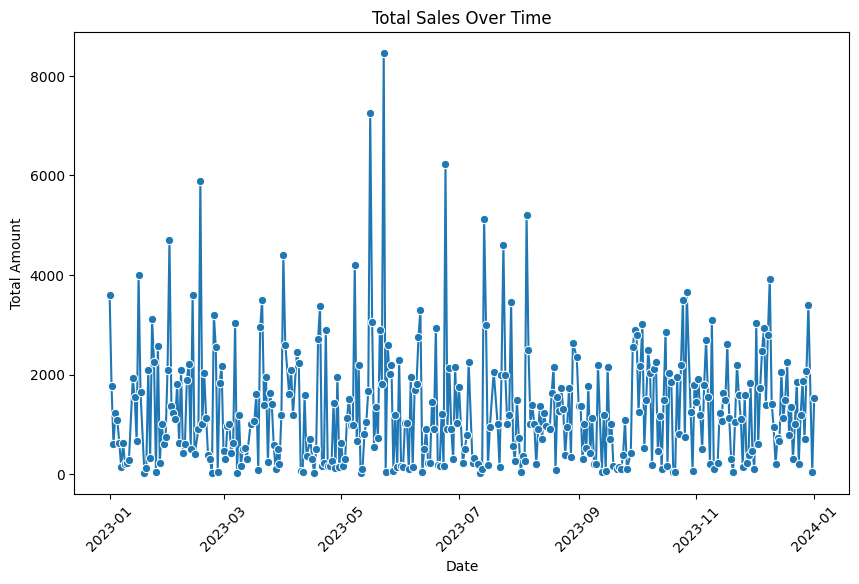

In [14]:
# 2. Line plot: Total Sales Over Time
sales_over_time = df.groupby('Date')['Total Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_over_time, x='Date', y='Total Amount', marker='o')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.show()


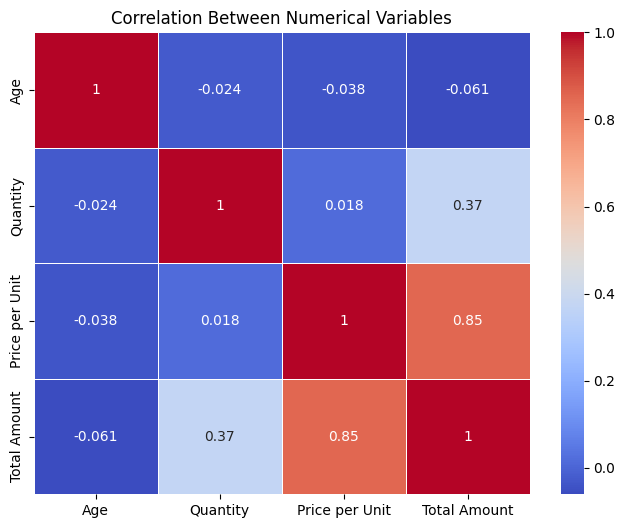

In [15]:
# 3. Heatmap: Correlation between numerical variables
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Numerical Variables')
plt.show()